In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('../data/labels.csv')

# Count the number of occurrences of each class in the target feature
class_counts = data['Diabetes_012'].value_counts()
min_class_count = class_counts.min()

# Create a balanced dataset
balanced_data = data.groupby('Diabetes_012').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)

# Print the number of rows for each class and the total size of the new dataset
print(f"Number of rows for each class (0, 1, 2): {min_class_count}")
print(f"Total size of the new balanced dataset: {balanced_data.shape[0]}")

data = balanced_data

Number of rows for each class (0, 1, 2): 4631
Total size of the new balanced dataset: 13893


Number of features: 21
Explained variance for component (3D): [0.16323897 0.08535274 0.06338945]
Total explained variance (3D): 0.3119811612786004
Reconstruction error MAE (3D): 0.5984775122477549


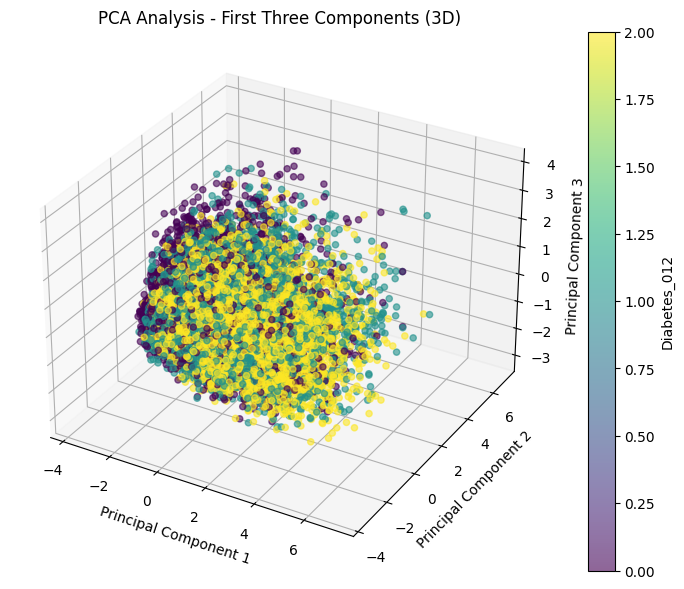

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']
print("Number of features:", features.shape[1])

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(features_scaled)
explained_variance_3d = pca_3d.explained_variance_ratio_
reconstruction_3d = pca_3d.inverse_transform(pca_components_3d)
reconstruction_error_3d = mean_absolute_error(features_scaled, reconstruction_3d)

# Output explained variance and reconstruction error
print("Explained variance for component (3D):", explained_variance_3d)
print("Total explained variance (3D):", explained_variance_3d.sum())
print("Reconstruction error MAE (3D):", reconstruction_error_3d)

# Plotting 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('PCA Analysis - First Three Components (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

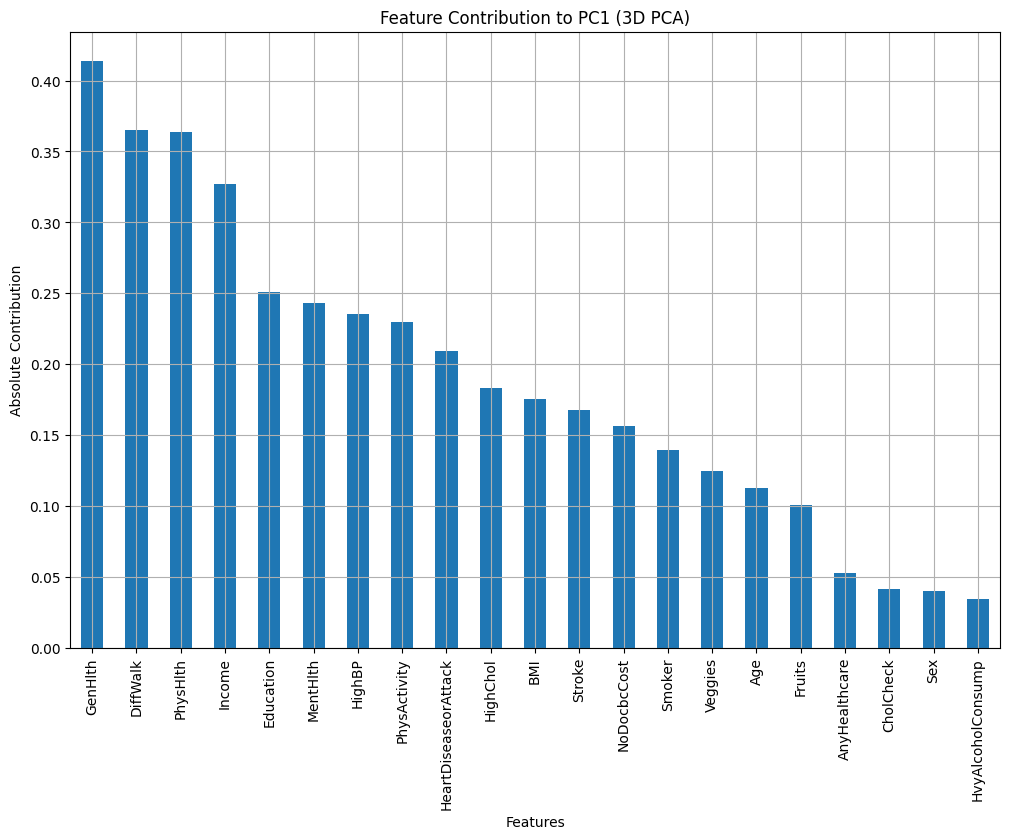

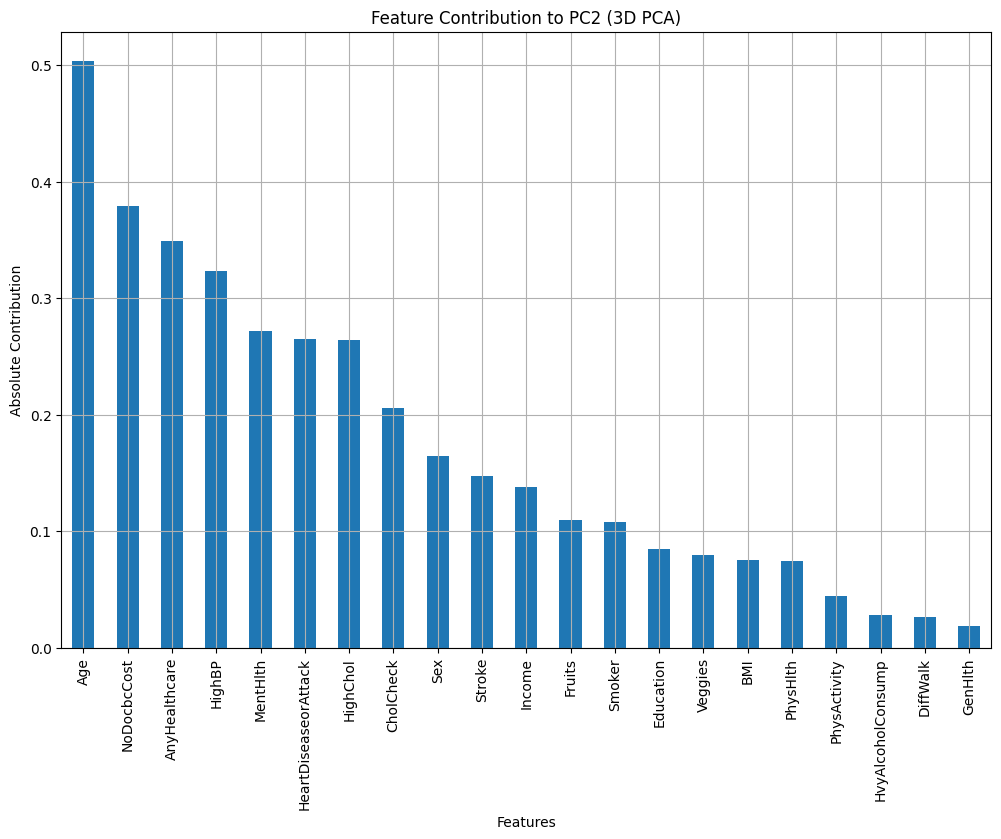

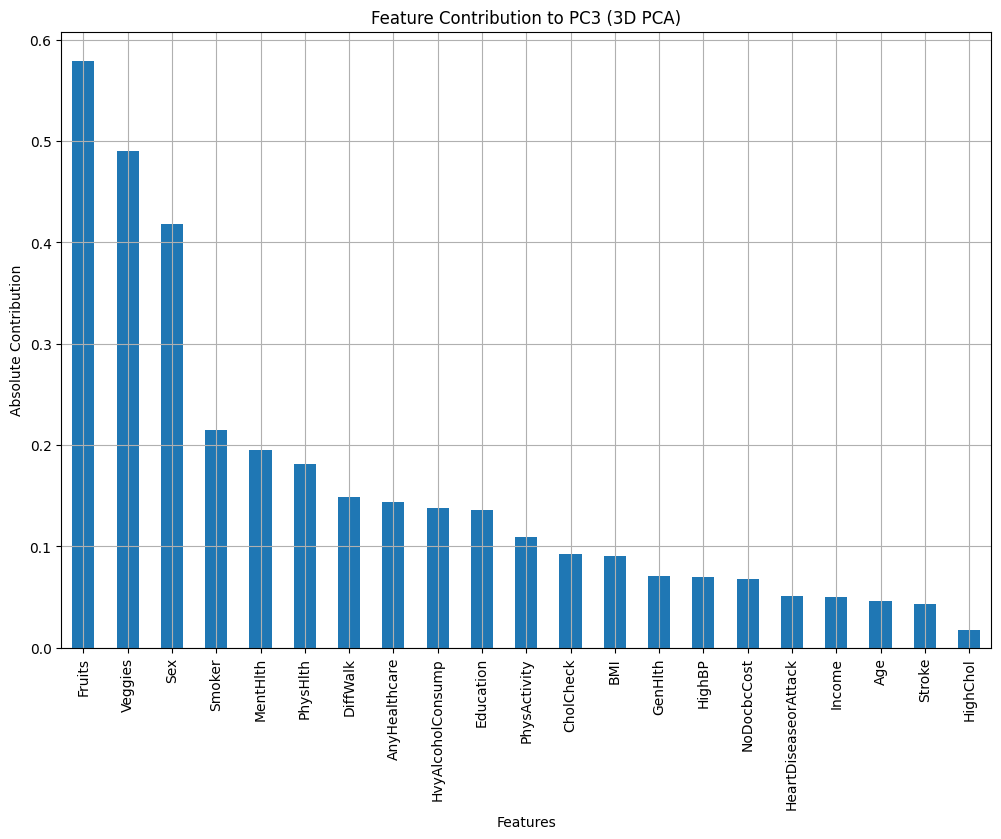

In [4]:
# Contribution of features to each component
components_3d_contribution = pd.DataFrame(pca_3d.components_, columns=features.columns, index=['PC1', 'PC2', 'PC3'])

components_3d_contribution_abs = components_3d_contribution.loc['PC1'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC1 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

components_3d_contribution_abs = components_3d_contribution.loc['PC2'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC2 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

components_3d_contribution_abs = components_3d_contribution.loc['PC3'].abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
components_3d_contribution_abs.plot(kind='bar')
plt.title('Feature Contribution to PC3 (3D PCA)')
plt.xlabel('Features')
plt.ylabel('Absolute Contribution')
plt.grid(True)
plt.show()

Best Perplexity: 70, Best KL Divergence: 1.2863277196884155


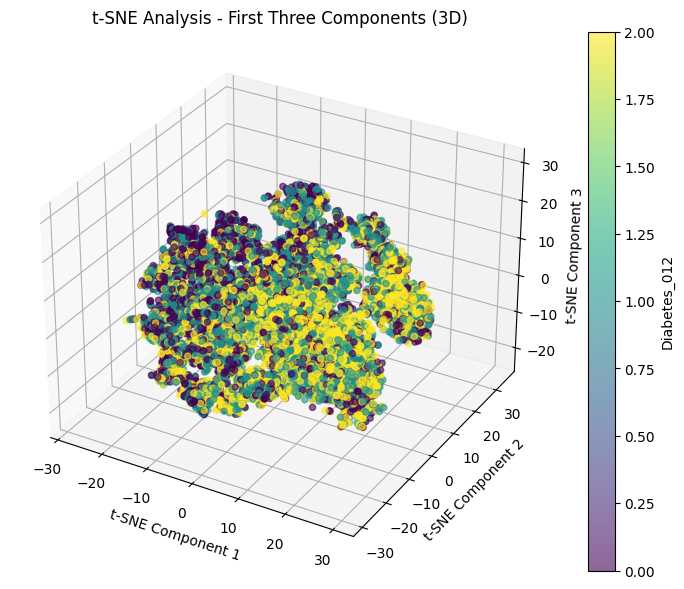

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

best_kl_divergence = float('inf')
best_perplexity = None
perplexities = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
KLs = list()

'''for perplexity in perplexities:
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
    comp = tsne.fit_transform(features_scaled)
    kl_divergence = tsne.kl_divergence_
    KLs.append(kl_divergence)
    print(f"Perplexity: {perplexity}, KL Divergence: {kl_divergence}")
    if kl_divergence < best_kl_divergence:
        best_kl_divergence = kl_divergence
        best_perplexity = perplexity
        tsne_3d = tsne
        tsne_components_3d = comp'''


tsne = TSNE(n_components=3, perplexity=70, random_state=42)
tsne_components_3d = tsne.fit_transform(features_scaled)
kl_divergence = tsne.kl_divergence_
print(f"Best Perplexity: 70, Best KL Divergence: {kl_divergence}")

# Plotting 3D t-SNE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_components_3d[:, 0], tsne_components_3d[:, 1], tsne_components_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('t-SNE Analysis - First Three Components (3D)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

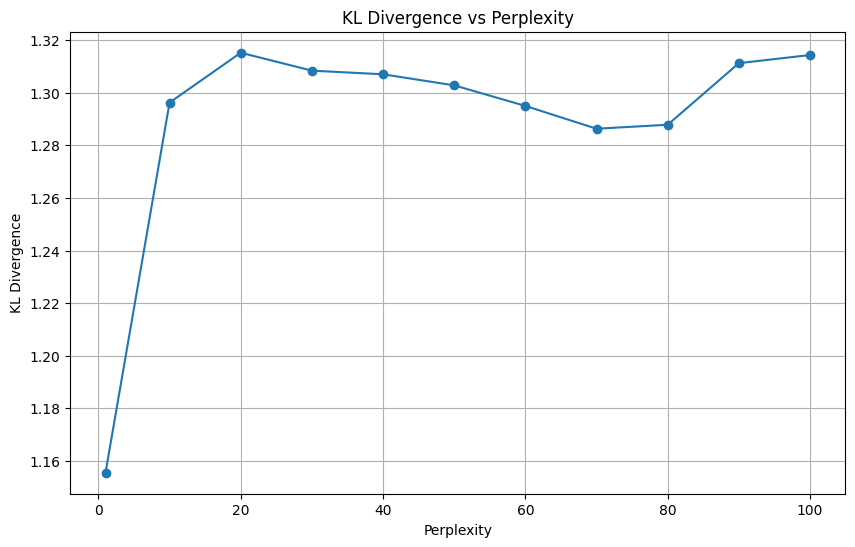

In [20]:
KLs = [
 1.1554832458496094,
 1.2962597608566284,
 1.3152384757995605,
 1.3084208965301514,
 1.3070350885391235,
 1.3028233051300049,
 1.2950012683868408,
 1.2863277196884155,
 1.2878409624099731,
 1.311271071434021,
 1.3143630027770996
]
plt.figure(figsize=(10, 6))
plt.plot(perplexities, KLs, marker='o')
plt.title('KL Divergence vs Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.grid(True)
plt.show()

Epoch 1/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - loss: 0.8774
Epoch 2/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6761
Epoch 3/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 0.6242
Epoch 4/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 0.6005
Epoch 5/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 0.5741
Epoch 6/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.5486
Epoch 7/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 0.5301
Epoch 8/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.5236
Epoch 9/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - loss: 0.5138
Epoch 10/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 0.5075
Epoch 11/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5051
Epoch 12/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5018
Epoch 13/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 0.5019
Epoch 14/40
869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.5026
Epoch 15/40
869/869 ━━━━━━━━━━━━━━━

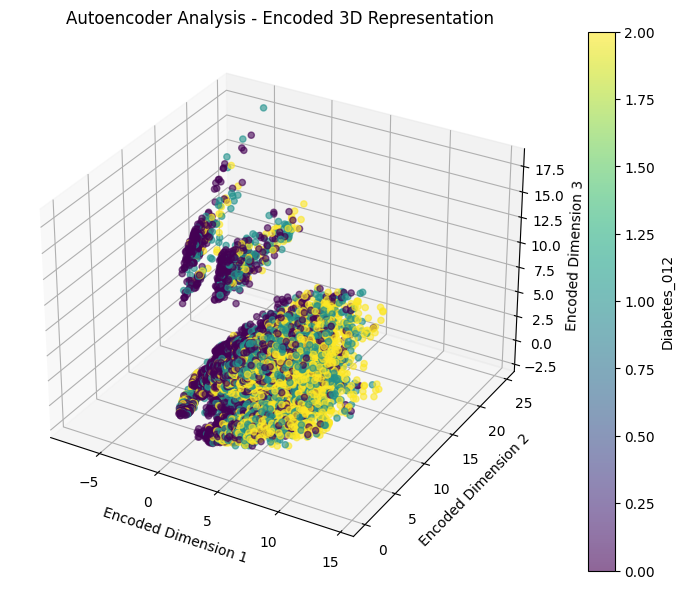

Reconstruction error (3D Autoencoder): 0.47153443074746754


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Separate features and target
features = data.drop(columns=['Diabetes_012'])
target = data['Diabetes_012']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Autoencoder model for 2D representation
input_dim = features_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

# Autoencoder model for 3D representation
encoder_3d = Dense(16, activation='leaky_relu')(input_layer)
encoder_3d = Dense(8, activation='leaky_relu')(encoder_3d)
encoder_3d = Dense(3, activation='leaky_relu')(encoder_3d)
decoder_3d = Dense(8, activation='leaky_relu')(encoder_3d)
decoder_3d = Dense(16, activation='leaky_relu')(decoder_3d)
decoder_3d = Dense(input_dim, activation='linear')(decoder_3d)
autoencoder_3d = Model(inputs=input_layer, outputs=decoder_3d)

# Compile and train the model
autoencoder_3d.compile(optimizer='adam', loss='mse')
history = autoencoder_3d.fit(features_scaled, features_scaled, epochs=40, batch_size=16, shuffle=True, verbose=True)

# Extract 3D encoded representation and compute reconstruction error
encoder_model_3d = Model(inputs=input_layer, outputs=encoder_3d)
encoded_features_3d = encoder_model_3d.predict(features_scaled)
reconstructed_features_3d = autoencoder_3d.predict(features_scaled)
reconstruction_error_3d = mean_absolute_error(features_scaled, reconstructed_features_3d)

# Plotting 3D encoded data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_features_3d[:, 0], encoded_features_3d[:, 1], encoded_features_3d[:, 2], c=target, cmap='viridis', alpha=0.6)
fig.colorbar(scatter, label='Diabetes_012')
ax.set_title('Autoencoder Analysis - Encoded 3D Representation')
ax.set_xlabel('Encoded Dimension 1')
ax.set_ylabel('Encoded Dimension 2')
ax.set_zlabel('Encoded Dimension 3')
plt.show()

print("Reconstruction error (3D Autoencoder):", reconstruction_error_3d)

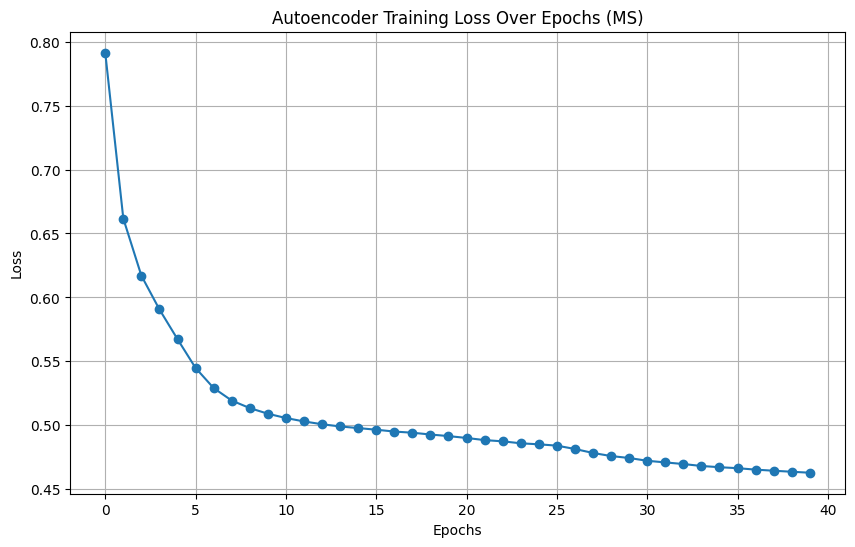

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], marker='o')
plt.title('Autoencoder Training Loss Over Epochs (MS)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()